In [30]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [32]:
# Define the data
mae_error = np.array([0.024968628435988363, 0.02321611293914339, 0.021942880945626134])
kernel_inversion_time = np.array([2.742901563644409, 4.731099367141724, 21.011255264282227])
prediction_time = np.array([492.4169478416443, 805.1010875701904, 1981.6894690990448])

# Print the arrays for verification
print("MAE Error:", mae_error)
print("Kernel Inversion Time:", kernel_inversion_time)
print("Prediction Time:", prediction_time)

MAE Error: [0.02496863 0.02321611 0.02194288]
Kernel Inversion Time: [ 2.74290156  4.73109937 21.01125526]
Prediction Time: [ 492.41694784  805.10108757 1981.6894691 ]


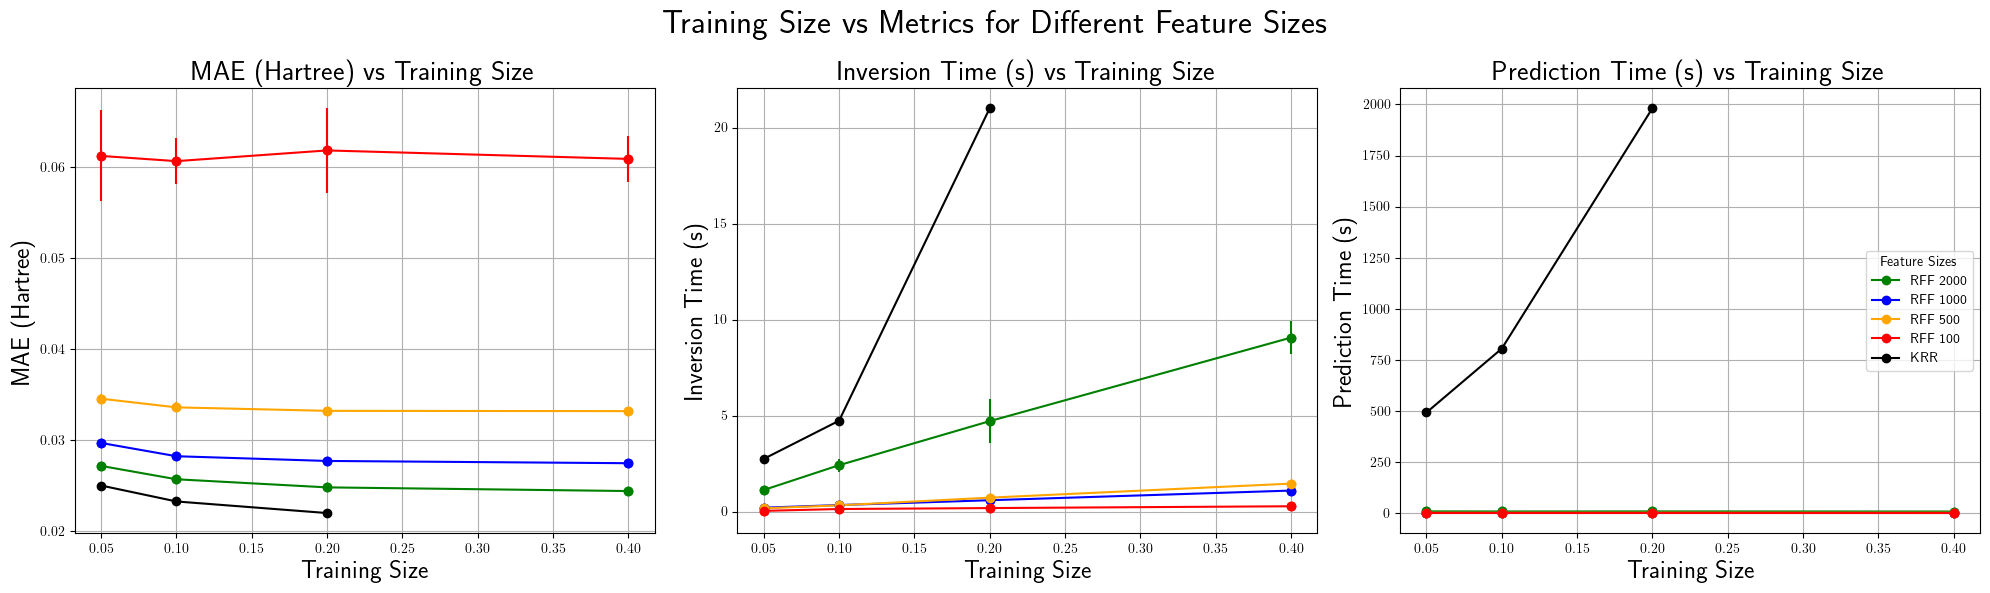

In [40]:
import numpy as np
import matplotlib.pyplot as plt

# Load datasets and convert them to dictionaries for easier manipulation
data_2000 = {key: value for key, value in np.load('time_diff/RFF_n2000.npz').items()}
data_1000 = {key: value for key, value in np.load('dataset/qm9_1000_rff.npz').items()}
data_500 = {key: value for key, value in np.load('time_diff/RFF_n500.npz').items()}
data_100 = {key: value for key, value in np.load('time_diff/RFF_n100.npz').items()}

# Rename keys in each dataset
for dataset in [data_2000, data_1000, data_500, data_100]:
    if 'inversion_time' in dataset:
        dataset['time_to_invert'] = dataset.pop('inversion_time')
    if 'prediction_time' in dataset:
        dataset['time_to_predict'] = dataset.pop('prediction_time')

# Define x-axis and y-axis labels
x_axis = [0.05, 0.1, 0.2, 0.4]
y_label_dict = {'maes': 'MAE (Hartree)', 'time_to_invert': 'Inversion Time (s)', 
                'time_to_predict': 'Prediction Time (s)'}

# Extract keys for each dataset
data_2000_keys = list(data_2000.keys())
data_1000_keys = list(data_1000.keys())
data_500_keys = list(data_500.keys())
data_100_keys = list(data_100.keys())

# Create subplots (1 row, 3 columns)
fig, axs = plt.subplots(1, 3, figsize=(20, 6))

# Iterate over metrics to plot them on different subplots
for i, key in enumerate(['maes', 'time_to_invert', 'time_to_predict']):  # Specify keys explicitly
    # Plot data for each feature size on the same subplot
    for data, keys, label, color in zip(
        [data_2000, data_1000, data_500, data_100],
        [data_2000_keys, data_1000_keys, data_500_keys, data_100_keys],
        ['RFF 2000', 'RFF 1000', 'RFF 500', 'RFF 100', 'KRR'],
        ['g', 'b', 'orange', 'r', 'black']
    ):
        if key in keys:  # Ensure the key exists in the dataset
            summed = np.mean(data[key], axis=0)
            stddev = np.std(data[key], axis=0, ddof=0)
            axs[i].plot(x_axis, summed, marker='o', color=color, label=label)
            axs[i].errorbar(x_axis, summed, yerr=stddev, color=color, fmt='o')

    # Customize subplot
    axs[i].set_ylabel(y_label_dict[key], fontsize=18)
    axs[i].set_xlabel('Training Size', fontsize=18)
    axs[i].set_title(f'{y_label_dict[key]} vs Training Size', fontsize=20)
    axs[i].grid(True)



new_x_axis = [0.05, 0.1, 0.2]
axs[0].plot(new_x_axis, mae_error, marker='o', color='black', label='KRR')
axs[1].plot(new_x_axis, kernel_inversion_time, marker='o', color='black', label='KRR')
axs[2].plot(new_x_axis, prediction_time, marker='o', color='black', label='KRR')
# Add legend to the last subplot
axs[-1].legend(title="Feature Sizes", loc='center right')

# Set a global title
fig.suptitle('Training Size vs Metrics for Different Feature Sizes', fontsize=24)

# Adjust layout
plt.tight_layout()
plt.subplots_adjust(top=0.85)

# Save the plot
plt.savefig('Training_Size_vs_Metrics_Subplots_Renamed.pdf')
plt.show()

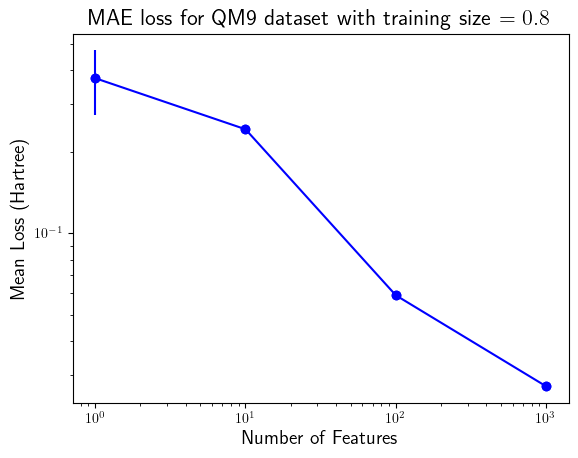

In [29]:
data_1 = np.load('feature_sweep_results/it5cv4/losses.npz')
plt.rc('text', usetex=True)
feature_x_axis = [1, 10, 100, 1000]
mean = np.mean(data_1['mean_losses'], axis=0)
error = np.std(data_1['mean_losses'], axis=0, ddof=0)
plt.errorbar(feature_x_axis, mean, yerr=error, fmt='o', color='b')
# plt.fill_between(feature_x_axis, mean - error, mean + error, color='b', alpha=0.2)
plt.xlabel('Number of Features', fontsize=14)
plt.ylabel('Mean Loss (Hartree)', fontsize=14)
plt.loglog(feature_x_axis, mean, marker='o', color='b')
plt.title('MAE loss for QM9 dataset with training size $= 0.8$', fontsize=16)
plt.savefig('QM9_Mean_Loss_vs_Training_Size.pdf')
plt.show()


In [28]:
data_2 = np.load('feature_sweep_results/it5cv4/hyperparameters.npz')
data_2['best_scores']

array([[0.3007972 , 0.22002244, 0.05696729, 0.02741673],
       [0.2910018 , 0.2200911 , 0.0560074 , 0.02734544],
       [0.29990146, 0.21922576, 0.05741432, 0.02738851],
       [0.30099192, 0.2217734 , 0.05770022, 0.02732228],
       [0.2924288 , 0.22270656, 0.05825061, 0.02738111]], dtype=float32)